<a href="https://colab.research.google.com/github/Avanish023/Machine-learning-data--science/blob/master/lbinaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
###### reading dataset
data=pd.read_csv("/Dataset (1).csv")
pincodes=pd.read_csv("pincodes.csv")#####external dataset

In [3]:
#####basic eda

In [4]:
data.describe()

,id,pin_code,down_payment,loan_int_rate,tenure,loan_amount,birth_year,bureau_credit_score,moratorium_optin
count,15000.00000,15000.000000,14954.000000,15000.000000,15000.000000,15000.000000,15000.000000,14589.000000,15000.000000
mean,9109.69580,468939.833800,277.244148,38.262135,43.636933,14718.962401,1988.788000,595.416547,0.234267
std,5278.55478,203155.744075,2019.157606,3.027804,4.659975,25690.265686,7.498142,222.771374,0.423554
min,1.00000,110001.000000,0.000000,2.000000,39.000000,295.531800,1954.000000,300.000000,0.000000
25%,4522.25000,331951.500000,0.000000,38.000000,39.000000,4739.040000,1985.000000,300.000000,0.000000
50%,9113.50000,500050.000000,0.000000,38.240000,42.000000,7898.400000,1990.000000,704.000000,0.000000
75%,13678.25000,591103.500000,0.000000,38.240000,49.000000,13822.200000,1994.000000,783.000000,0.000000
max,18267.00000,855113.000000,43223.994000,58.000000,75.000000,296190.000000,2002.000000,900.000000,1.000000


In [5]:
data.shape

(15000, 13)

In [6]:
data.isna().sum()

id                       0
pin_code                 0
down_payment            46
loan_int_rate            0
tenure                   0
loan_amount              0
sector                   0
mandate_source         281
gender                   1
city                     0
birth_year               0
bureau_credit_score    411
moratorium_optin         0
dtype: int64

In [7]:
##### finding unique values in each column
for i in data.columns:
  print(i, len(data[i].unique()))

id 15000
pin_code 5593
down_payment 185
loan_int_rate 22
tenure 13
loan_amount 3969
sector 7
mandate_source 6
gender 3
city 1325
birth_year 49
bureau_credit_score 404
moratorium_optin 2


In [8]:
##### filling up the missing values 
#### for catagorical with mode and for numerical with
data['down_payment'].fillna(data['down_payment'].mean(),inplace=True)
data['bureau_credit_score'].fillna(data['bureau_credit_score'].mean(),inplace=True)
data['mandate_source'].fillna(data['mandate_source'].mode(),inplace=True)

In [9]:
######## univariate analysis

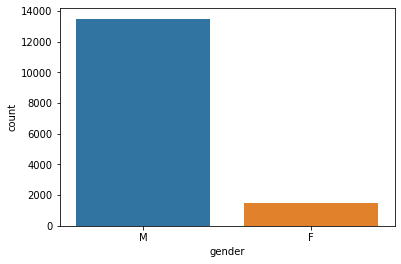

In [10]:
sns.countplot(data=data,x='gender')

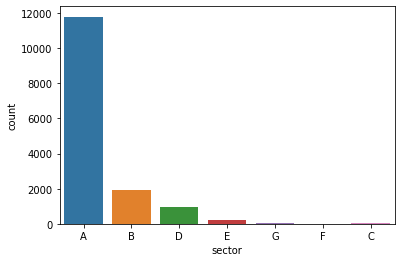

In [11]:
sns.countplot(data=data,x='sector')

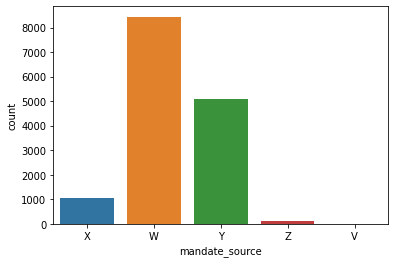

In [12]:
sns.countplot(data=data,x='mandate_source')


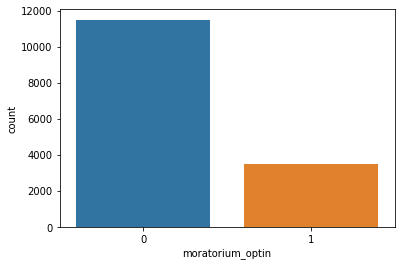

In [13]:

sns.countplot(data=data,x='moratorium_optin')


In [14]:
##### there more than 5000 pincodes and 1500 cites , will create some extra features based on the external data sets

In [15]:
pincodes=pincodes[['Pincode','DistrictsName','City','State']]
pincodes.rename(columns={'Pincode':'pin_code'},inplace=True)
pincodes=pincodes.drop_duplicates(subset=['pin_code'])
data=pd.merge(data,pincodes,on='pin_code',how='left')
print(data.shape)

(15000, 16)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
#####creating age and zones columns
data['age']=2022-data['birth_year']
data['zones']=data['pin_code'].astype(str).str[0]

In [17]:
##### removing unwanted columns

In [18]:
data.drop(columns=['pin_code','birth_year','id','city'],axis=1, inplace=True)

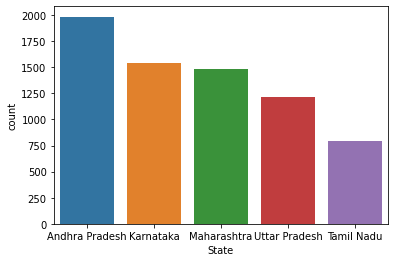

In [19]:
sns.countplot(data=data,x='State',order=data.State.value_counts().iloc[:5].index)

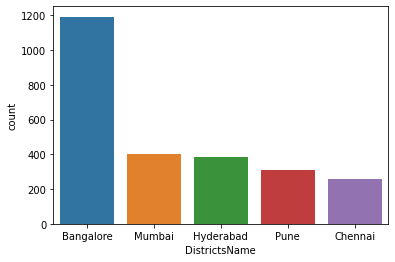

In [24]:
sns.countplot(data=data,x='DistrictsName',order=data.DistrictsName.value_counts().iloc[:5].index)

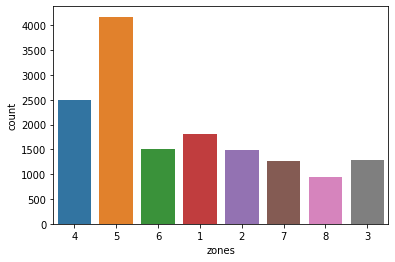

In [25]:
sns.countplot(data=data,x='zones')

In [26]:
data_boxplot=data[['down_payment', 'loan_int_rate', 'tenure', 'loan_amount','bureau_credit_score','age']]

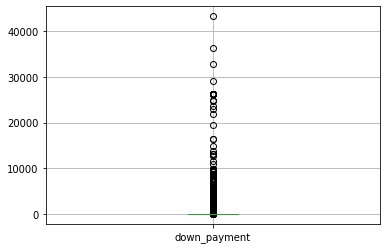

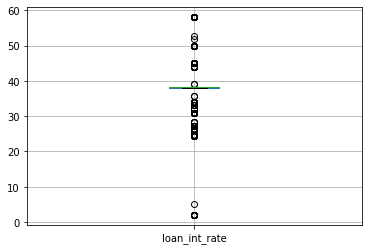

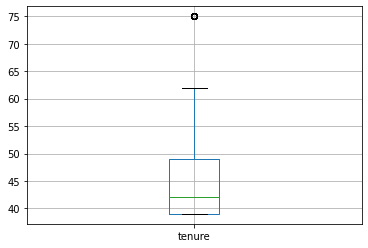

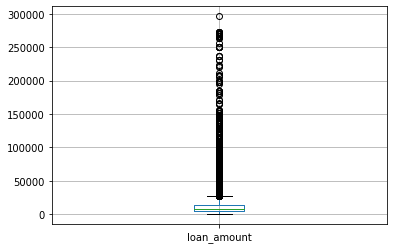

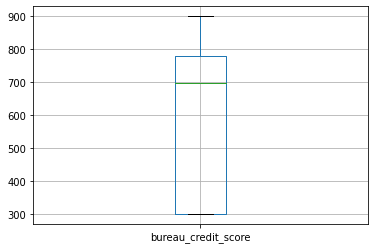

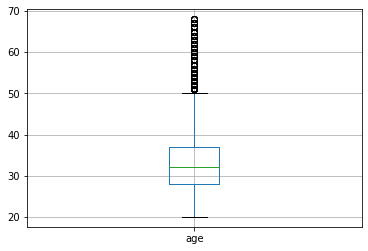

In [28]:
for column in data_boxplot:
    plt.figure()
    data_boxplot.boxplot([column])

In [ ]:
#######insights from univariate analysis
#### More than 85 % are male 
#### A sector contibutes to 80% of data
#### W and Y are the main mandate source contributes to 90% of data
##### 23% of people opted for montrium
#### Data has Andra pradesh as highest no of records
#### loan intrest rate, age and tennure have outlier they might needs to be treated
#### credit score and tennure does not have any outlier



In [29]:
data.columns

Index(['down_payment', 'loan_int_rate', 'tenure', 'loan_amount', 'sector',
       'mandate_source', 'gender', 'bureau_credit_score', 'moratorium_optin',
       'DistrictsName', 'City', 'State', 'age', 'zones'],
      dtype='object')

In [ ]:
##### bivariate  and multivariate analysis analyis

In [30]:
#### numerical variables
data.groupby('moratorium_optin').agg('mean')[['down_payment', 'loan_int_rate', 'tenure', 'loan_amount','bureau_credit_score','age']]

,down_payment,loan_int_rate,tenure,loan_amount,bureau_credit_score,age
moratorium_optin,,,,,,
0,347.329889,38.246758,43.495647,16038.495849,594.906244,33.131726
1,48.159112,38.312396,44.098748,10405.882953,597.084542,33.474388


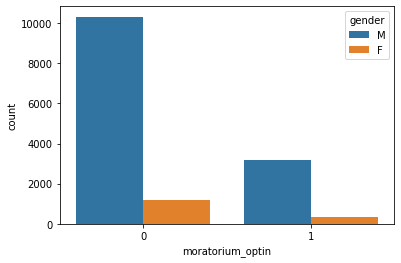

In [32]:
sns.countplot(data=data,x='moratorium_optin',hue='gender')

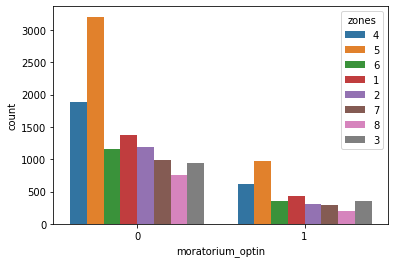

In [34]:
sns.countplot(data=data,x='moratorium_optin',hue='zones')

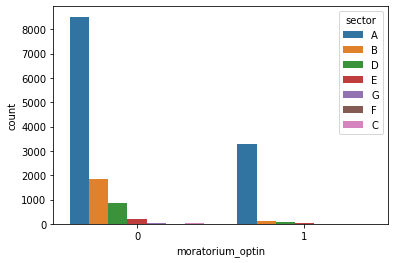

In [35]:
sns.countplot(data=data,x='moratorium_optin',hue='sector')

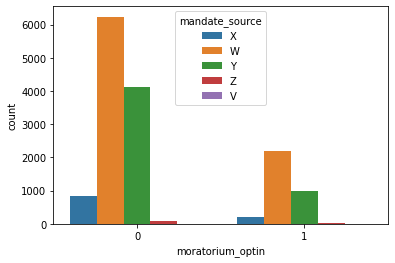

In [36]:
sns.countplot(data=data,x='moratorium_optin',hue='mandate_source')

In [47]:
pt=pd.crosstab(data['State'],data['moratorium_optin'])

In [48]:
pt

moratorium_optin,0,1
State,,
Andaman Nicobar,11,0
Andhra Pradesh,1499,485
Arunachal Pradesh,11,4
Assam,144,33
Bihar,606,165
Chandigarh,20,11
Chhattisgarh,124,29
Dadra & Nagar Haveli,10,1
Daman & Diu,3,3
